# || The Sparks Foundation || GRIPDEC20 DSBA Task 1

# Author: Meenakshi Vashistha

### PROBLEM STATEMENT
### Predict the percentage of an student based on the no. of study hours.
### What will be predicted score if a student studies for 9.25 hrs/ day?

In [113]:
# importing libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## Reading dataset

In [114]:
data=pd.read_csv(r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Exploring Dataset

In [115]:
data.shape

(25, 2)

In [116]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## checking null values

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [118]:
data.isnull().mean()

Hours     0.0
Scores    0.0
dtype: float64

### Plotting the distribution of scores

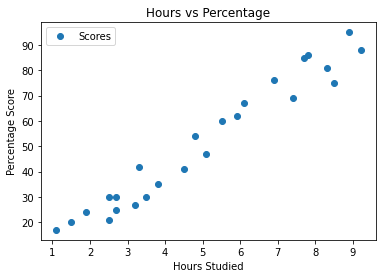

In [119]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### From the above graph, we can see that there is a linear relationship between "Hours Studied" and "Percentage Score"

### Defining a columns of dependent (target) variable and independent (features)

In [165]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values

In [166]:
type(X)

numpy.ndarray

## Training and testing split

In [167]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=100)

## Training the algorithm

In [170]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

LinearRegression()

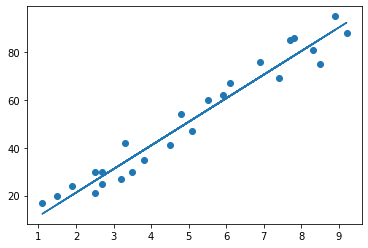

In [171]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line)
plt.show()

## Making predictions

In [172]:
# predicting outcome(Scores) values considering independent variable (Hours)
pred=regressor.predict(X_test)

In [188]:
pred

array([28.14877107, 39.00765694, 34.07179972, 59.73825724, 16.30271375,
       74.54582888, 69.60997167, 48.87937137])

In [174]:
Y_test

array([25, 35, 42, 62, 20, 69, 76, 54], dtype=int64)

In [180]:
# Comparing Actual vs Predicted

df=pd.DataFrame({"Actual": Y_test, "Predicted": pred})
df

,Actual,Predicted
0,25,28.148771
1,35,39.007657
2,42,34.071800
3,62,59.738257
4,20,16.302714
5,69,74.545829
6,76,69.609972
7,54,48.879371


In [193]:
# We can also test with our own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.80850057353504


## Evaluating model

In [181]:
from sklearn import metrics  
metrics.mean_absolute_error(Y_test, pred)

4.762517892332275